# 1. Problem Statement 
the competition entails the applications of machine learning to predict which passenger is likely to survive the RMS Titanic marine disaster that happened on 15th of April 1912.

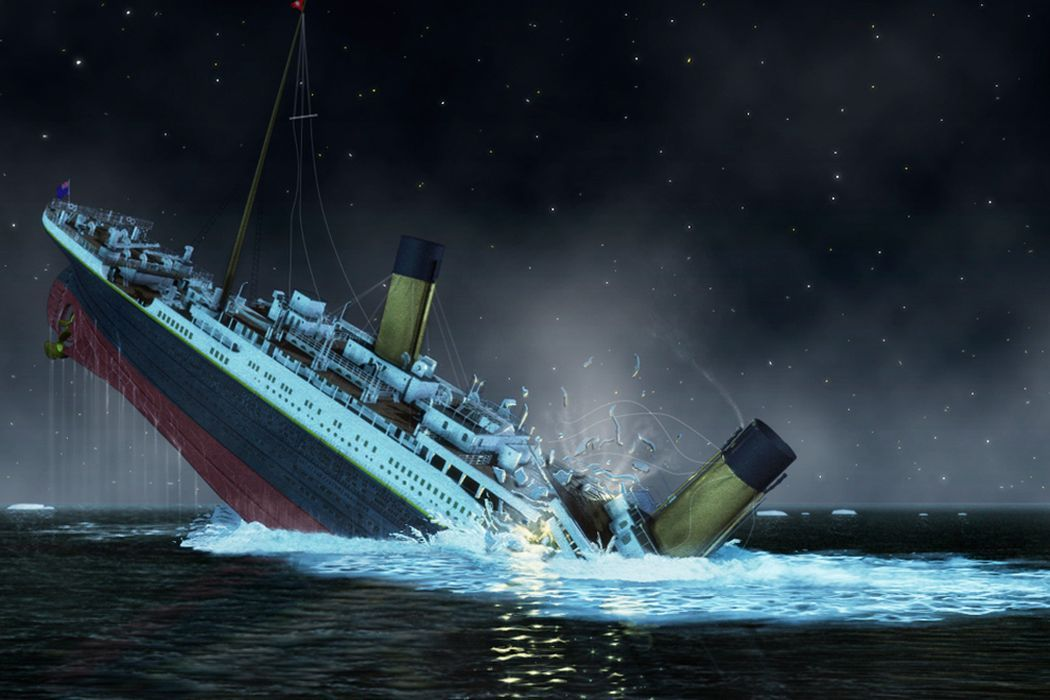

In [1]:
from IPython.display import Image
Image("image.jpg")

# 2. Data Collection
kaggle offered the training data and test data, you can download here:https://www.kaggle.com/c/titanic/data

## Data Loading with Pandas

In [2]:
import pandas as pd 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


## Exploratory data analysis
the train.head method will print the first 5 rows of the train dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#  3 Data Information
* Survived : 1 = Yes , 0 = No
* Ticket pass : 1 = 1st , 2=2nd , 3 = 3rd
* SibSp: # of siblings/spouses aboard the titanic
* Parch: # of parents / children 
* Embarked : Port of embarkment , C = Cherburg, Southampton , Q = Queenstown

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## import python lib for visualization

* Pclass 
* Sex 
* Sibsp(# of siblings and spouse)
* Parch (# of parents and children)
* Embarked 
* Cabin

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']== 1][feature].value_counts()
    dead = train[train['Survived']== 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind ='bar',stacked = True, figsize=(10,5))

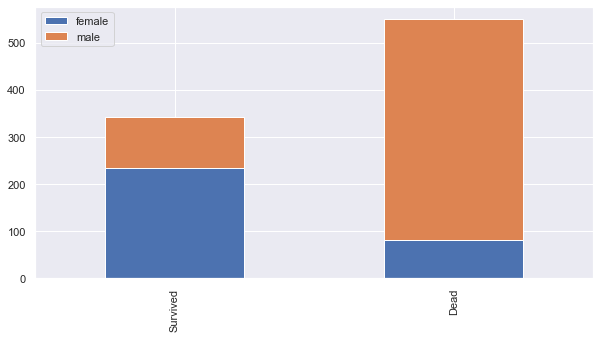

In [12]:
bar_chart ('Sex')

The chart visualized above shows more female are likely to survive than the men

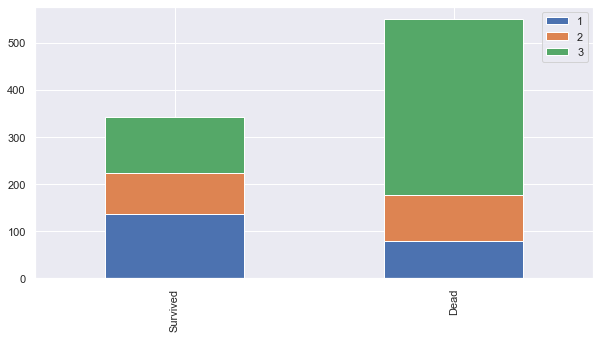

In [13]:
bar_chart('Pclass')

The chart confirms that passengers in 1st class more likely survive than other classes
The chart confirms that passengers in 3rd class are more likely to die than oather classes

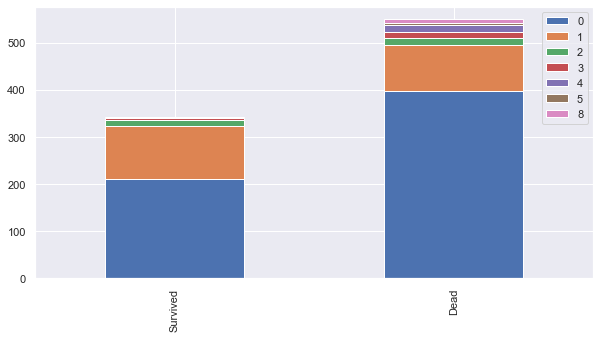

In [14]:
bar_chart('SibSp')

* The Chart confirms a person aboarded with more than 2 siblings or spouse are more likely to survive
* The chart confirms a person abooarded without siblings or spouse more likely dead

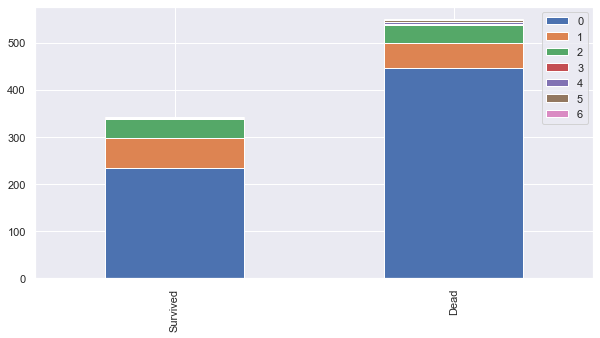

In [15]:
bar_chart('Parch')

The chart confirms a person with more than 2 is more likely to survive
The chart confirms a person aboarded alone is more likely to die

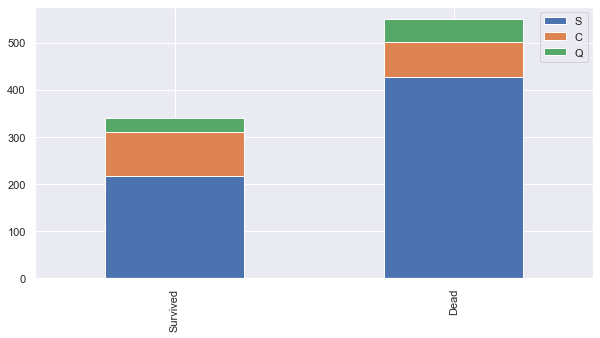

In [16]:
bar_chart("Embarked")

# 4 Feature Engineering  

In [17]:
combined_data = [train,test]

for dataset in combined_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Countess      1
Mme           1
Ms            1
Lady          1
Capt          1
Sir           1
Don           1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

title map 
mr:0
miss : 1
mrs : 2
others:3

In [20]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master": 3, "Dr":3,"Rev":3,"Major":3,"Mlle":3,"Col":3,"Lady":3, "Countess":3,"Jonkheer":3,"Mme":3,"Ms":3,"Sir":3,"Capt":3,"Don":3,"Dona":3,}

for dataset in combined_data:
    dataset['Title']= dataset['Title'].map(title_mapping)

In [21]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


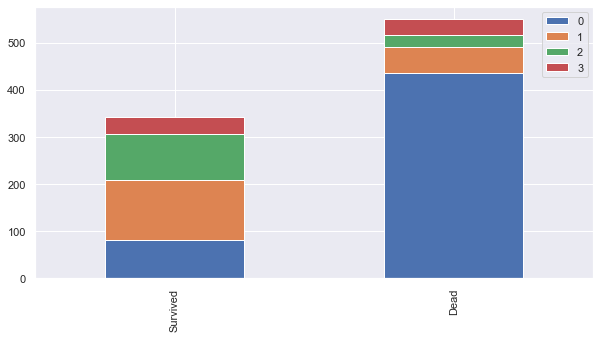

In [22]:
bar_chart('Title')

In [23]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name', axis=1,inplace=True)

# Sex Mapping 
* male:0
* female:1

In [24]:
sex_map = {"male":0,"female":1}
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map(sex_map)

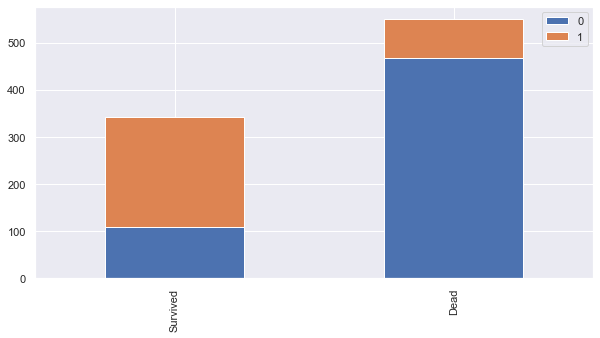

In [25]:
bar_chart('Sex')

# Age 
## some age is missing 
let's use Title's median age for missing Age

In [26]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [27]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

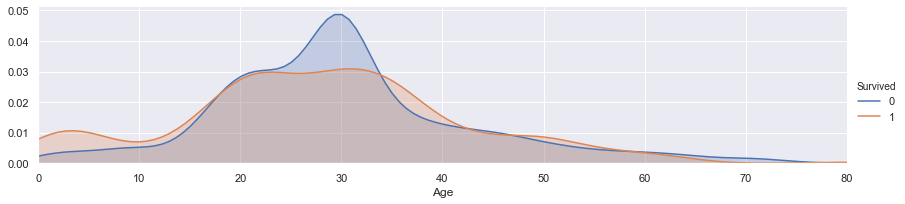

In [28]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

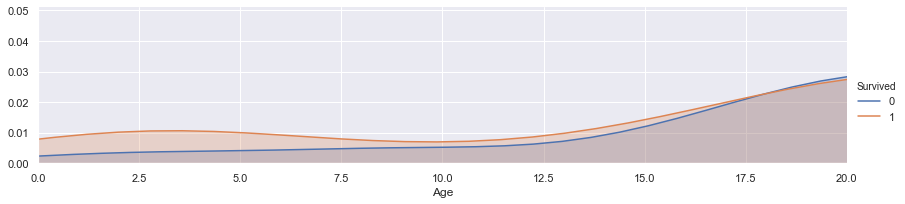

In [29]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 40)

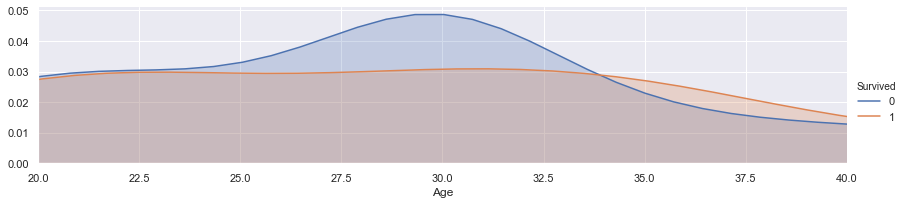

In [30]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

(40, 60)

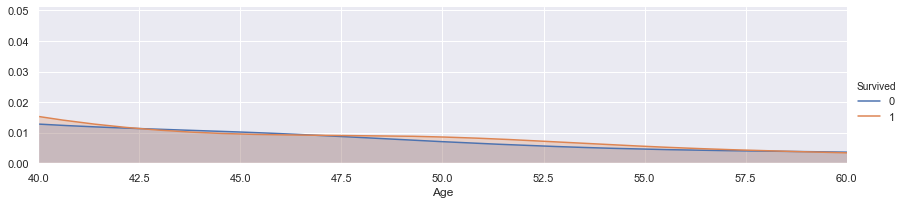

In [31]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

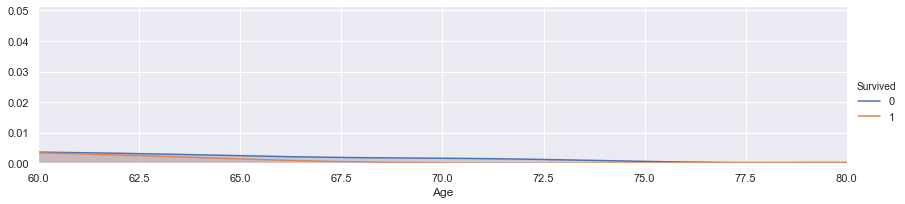

In [32]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

## Binning 
Binning / Converting Numerical Age to Categorical Variable

## feature vector map : 
* child:0
* young:1
* adult:2
* mid-age:3
* senior:4

In [33]:
for dataset in combined_data: 
    dataset.loc[dataset['Age']<= 16,'Age']= 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26),'Age']=1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36),'Age']=2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62),'Age']=3,
    dataset.loc[(dataset['Age'] > 62,'Age')]=4
    

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


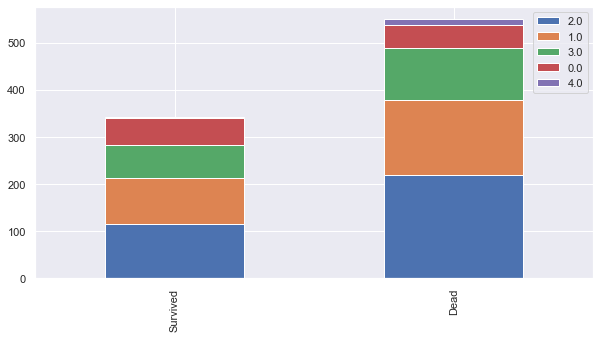

In [35]:
bar_chart('Age')

# Embarked

## filling missing values

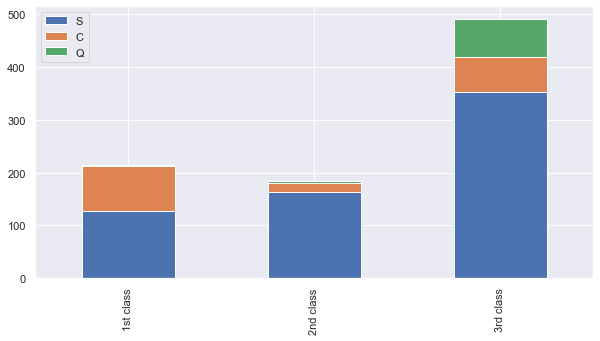

In [36]:
First_class = train[train['Pclass']==1]['Embarked'].value_counts()
Second_class= train[train['Pclass']==2]['Embarked'].value_counts()
Third_class = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([First_class,Second_class,Third_class])
df.index= ['1st class','2nd class','3rd class']
df.plot(kind = 'bar',stacked = True,figsize=(10,5))

more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark 
more than 50% of 3rd class are from S embark
### fill out missing embark with S embark

In [37]:
for dataset in combined_data:
    dataset ['Embarked'] = dataset['Embarked'].fillna('S')

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [39]:
embarked_map = {"S":0,"C":1,"Q":2}
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


# Fare
fill missing fare with median fare for each pclass


In [41]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


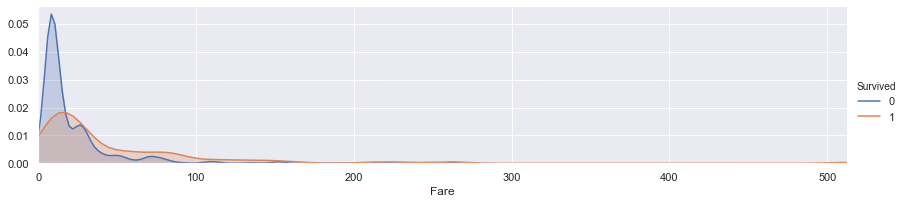

In [42]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim =(0,train['Fare'].max()))
facet.add_legend()

plt.show()

In [43]:
for dataset in combined_data:
    dataset.loc[dataset['Fare']<= 17,'Fare'] = 0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare'] <= 30),'Fare']= 1,
    dataset.loc[(dataset['Fare']> 30) & (dataset['Fare']<= 100),'Fare']= 2,
    dataset.loc[dataset['Fare']> 100,'Fare']= 3

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [45]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
E17            1
C30            1
B69            1
B41            1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [46]:
for dataset in combined_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

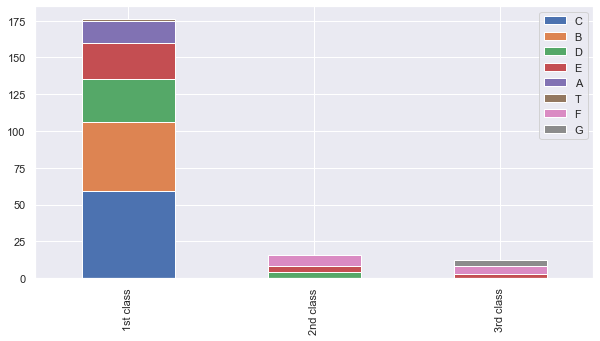

In [47]:
class1= train[train['Pclass']==1]['Cabin'].value_counts()
class2 = train[train['Pclass']== 2]['Cabin'].value_counts()
class3 = train[train['Pclass']== 3]['Cabin'].value_counts()
df = pd.DataFrame([class1,class2,class3])
df.index= ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked= True,figsize=(10,5))

In [48]:
Cabin_map = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in combined_data:
    dataset['Cabin'] = dataset['Cabin'].map(Cabin_map)

In [49]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)


# FamilySize

In [50]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

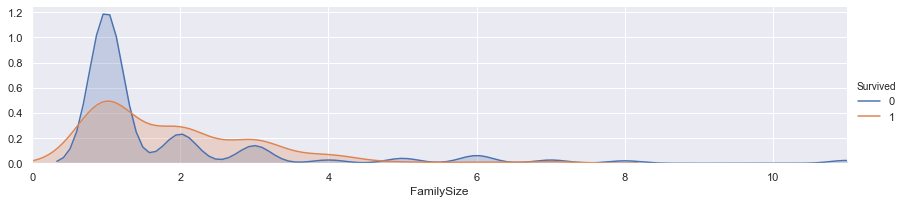

In [51]:
facet = sns.FacetGrid(train,hue= "Survived",aspect = 4)
facet.map(sns.kdeplot,'FamilySize',shade = True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [52]:
family_map = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in combined_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_map)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [54]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis = 1)
train= train.drop(['PassengerId'],axis = 1)

In [55]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']
train_data.shape,target.shape

((891, 8), (891,))

In [56]:
train_data.head(20)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


# Modelling 

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


### Cross Validation (K-fold)

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10,shuffle=True,random_state = 0)

## KNN

In [60]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [61]:
##KNN Score 
round(np.mean(score)*100,2)

82.6

## Decision Tree 

In [62]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.76404494 0.8988764  0.75280899
 0.82022472 0.82022472 0.74157303 0.79775281]


In [63]:
#decision tree score 
round(np.mean(score)* 100,2)

79.58

## Random Forest 

In [64]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.83146067 0.80898876 0.79775281 0.88764045 0.82022472
 0.82022472 0.79775281 0.75280899 0.79775281]


In [65]:
#Random Forest Score
round(np.mean(score)* 100,2)

81.03

## Navies Bayes 

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [67]:
round(np.mean(score)*100,2)

78.78

## SVM 

In [68]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)


[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [69]:
round(np.mean(score)*100,2)

83.5

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


## Testing

In [71]:
clf =SVC()
clf.fit(train_data,target)
test_Title = test['Title'].astype(int)
test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [72]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('Submit.csv',index=False)

In [73]:
submission = pd.read_csv('Submit.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
